In [1]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv1D, MaxPool1D,Flatten,Dense,Dropout,BatchNormalization
from tensorflow.keras.optimizers import Adam

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn import datasets,metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

**Loading the Built-in Sklearn Breast Cancer** **Dataset**

In [7]:
cancerData = datasets.load_breast_cancer()

In [8]:
X = pd.DataFrame(data = cancerData.data, columns=cancerData.feature_names )
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [9]:
y = cancerData.target

In [10]:
X.shape

(569, 30)

**Splitting into Train and Test datasets**

In [11]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.1,stratify=y)

In [12]:
X_train.shape

(512, 30)

In [13]:
y_test.shape

(57,)

**Applying StandardScaler()**

In [14]:
scaler = StandardScaler()

In [15]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**Reshaping the dataset to 3-D to pass it through CNN**

In [16]:
X_train = X_train.reshape(512,30,1)
X_test = X_test.reshape(57,30,1)

**Preparing the Model**

In [17]:
model = Sequential()
model.add(Conv1D(filters=16,kernel_size=2,activation='relu',input_shape=(30,1)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv1D(32,2,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(32,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(1,activation='sigmoid'))

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 29, 16)            48        
_________________________________________________________________
batch_normalization (BatchNo (None, 29, 16)            64        
_________________________________________________________________
dropout (Dropout)            (None, 29, 16)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 28, 32)            1056      
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 32)            128       
_________________________________________________________________
dropout_1 (Dropout)          (None, 28, 32)            0         
_________________________________________________________________
flatten (Flatten)            (None, 896)               0

In [19]:
model.compile(optimizer=Adam(learning_rate=0.0001),loss='binary_crossentropy',metrics=['accuracy'])

In [20]:
history = model.fit(X_train,y_train,epochs=35,verbose=1,validation_data=(X_test,y_test))

Epoch 1/35
16/16 [==============================] - 2s 37ms/step - loss: 0.9378 - accuracy: 0.4876 - val_loss: 0.6142 - val_accuracy: 0.8947
Epoch 2/35
16/16 [==============================] - 0s 6ms/step - loss: 0.5500 - accuracy: 0.7330 - val_loss: 0.5345 - val_accuracy: 0.9474
Epoch 3/35
16/16 [==============================] - 0s 7ms/step - loss: 0.3529 - accuracy: 0.8392 - val_loss: 0.4669 - val_accuracy: 0.9123
Epoch 4/35
16/16 [==============================] - 0s 6ms/step - loss: 0.2927 - accuracy: 0.8703 - val_loss: 0.4157 - val_accuracy: 0.9123
Epoch 5/35
16/16 [==============================] - 0s 8ms/step - loss: 0.2633 - accuracy: 0.8951 - val_loss: 0.3752 - val_accuracy: 0.9123
Epoch 6/35
16/16 [==============================] - 0s 6ms/step - loss: 0.2088 - accuracy: 0.9340 - val_loss: 0.3413 - val_accuracy: 0.9123
Epoch 7/35
16/16 [==============================] - 0s 6ms/step - loss: 0.1895 - accuracy: 0.9122 - val_loss: 0.3140 - val_accuracy: 0.9123
Epoch 8/35
16/16 [=

**Plots of Accuracy and Loss**

In [21]:
def plotLearningCurve(history,epochs):
  epochRange = range(1,epochs+1)
  plt.plot(epochRange,history.history['accuracy'])
  plt.plot(epochRange,history.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend(['Train','Validation'],loc='upper left')
  plt.show()

  plt.plot(epochRange,history.history['loss'])
  plt.plot(epochRange,history.history['val_loss'])
  plt.title('Model Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend(['Train','Validation'],loc='upper left')
  plt.show()

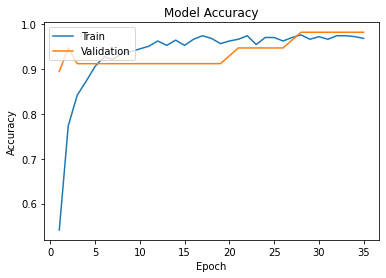

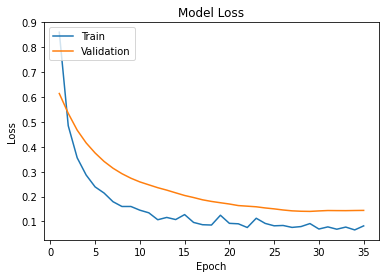

In [22]:
plotLearningCurve(history,35)